# Data Exploration and Preprocessing 

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")


names = []
for x in range(69):
  names.append(x)

def load_housing_data():
  return pd.read_csv("/content/Citizen_Satisfaction_Survey.csv", names = names, header = 0)


In [0]:
survey = load_housing_data()
survey.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68
0,1,2007,23456,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Dissatisfied,Dissatisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,They should reduce the traffic flow problems,No,No,No,Yes,No,No,Yes,NaN,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Owns/Has mortgage,12,No,Suffolk,45 to 54,NaN,White (Caucasian),Beyond high school,Yes,"$100,000 to $124,999",Male
1,2,2007,23455,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Satisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,Satisfied,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,I think everything is fine,No,No,No,Yes,No,No,Yes,NaN,Agree,Agree,Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Rents,15,No,Chesapeake,45 to 54,NaN,African American,High school or less,No,"$20,000 to $39,999",Male
2,3,2007,23455,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Satisfied,Dissatisfied,Very Satisfied,Very Satisfied,Dissatisfied,Very Dissatisfied,Dissatisfied,Very Dissatisfied,Dissatisfied,Very Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,The City should create/preserve more green spaces,No,Yes,Yes,Yes,Yes,No,Yes,NaN,Strongly Agree,Agree,Disagree,Strongly Agree,NaN,Strongly Agree,Strongly Agree,NaN,NaN,NaN,NaN,Rents,35,No,Chesapeake,45 to 54,NaN,White (Caucasian),High school or less,No,"Under $20,000",Female
3,4,2007,23452,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,NaN,NaN,NaN,Dissatisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,They should focus more on regionalism and regi...,No,No,Yes,No,No,Yes,No,NaN,Strongly Agree,Agree,Agree,Strongly Agree,NaN,Strongly Agree,Agree,NaN,NaN,NaN,NaN,Owns/Has mortgage,19,No,Norfolk,45 to 54,NaN,African American,Beyond high school,Yes,"$125,000 or more",Male
4,5,2007,23462,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,NaN,NaN,NaN,Satisfied,Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Satisfied,Satisfied,Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,Satisfied,Very Satisfied,I think everything is fine,Yes,Yes,Yes,Yes,Yes,Yes,Yes,NaN,Strongly Agree,Agree,Agree,Strongly Agree,NaN,Agree,Agree,NaN,NaN,NaN,NaN,Rents,20,Yes,Virginia Beach (incl. works from home),26 to 34,NaN,African American,Beyond high school,Yes,"$40,000 to $59,999",Female


# Encoding of Categorical Data

In [0]:
#the encoders weren't working so i just decided to make my own
def encoder(x, dataset):

  for index in range(len(dataset[x])):
    if dataset[x][index] == "Very Dissatisfied":
      dataset[x][index] = 2
    elif dataset[x][index] == "Dissatisfied":
      dataset[x][index] = 5
    elif dataset[x][index] == "Satisfied":
      dataset[x][index] = 9
    elif dataset[x][index] == "Very Satisfied":
      dataset[x][index] = 14
    else:
      dataset[x][index] = 0
      continue
      
# encoding columns 3-19 
# encoding columns 23-37
def data_clean_up(dataset, columns):
  for item in columns:
    for x in range(item[0],item[1]+1):
      encoder(x, dataset)
      survey[x] = pd.to_numeric(survey[x])



columns = [[3,19],[23,37]]
#decided to convert categorical values before I split the set since we need labels and stuff
data_clean_up(survey, columns)

#copying survey since we're going to need demographic data to do this
survey_demographic = survey
#dropping columns that aren't going to be used
survey = survey.drop([0,1,2,20,21,22,38,46,51,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68], axis=1)
#creating labels
survey["labels"] = survey.sum(axis=1, skipna = True, numeric_only = True)
#since we've created the labels, I'm going to drop those rows
labels = pd.DataFrame(data=survey["labels"])
survey_demographic = survey_demographic.drop([0,1,2,20,21,22,38,46,51,54,55,56,57,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37, 61,63], axis=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/py

In [0]:

labels = np.log(labels)

In [0]:
survey_demographic.head()

,39,40,41,42,43,44,45,47,48,49,50,52,53,58,59,60,62,64,65,66,67,68
0,No,No,No,Yes,No,No,Yes,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Strongly Agree,Agree,Owns/Has mortgage,12,No,45 to 54,White (Caucasian),Beyond high school,Yes,"$100,000 to $124,999",Male
1,No,No,No,Yes,No,No,Yes,Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Rents,15,No,45 to 54,African American,High school or less,No,"$20,000 to $39,999",Male
2,No,Yes,Yes,Yes,Yes,No,Yes,Strongly Agree,Agree,Disagree,Strongly Agree,Strongly Agree,Strongly Agree,Rents,35,No,45 to 54,White (Caucasian),High school or less,No,"Under $20,000",Female
3,No,No,Yes,No,No,Yes,No,Strongly Agree,Agree,Agree,Strongly Agree,Strongly Agree,Agree,Owns/Has mortgage,19,No,45 to 54,African American,Beyond high school,Yes,"$125,000 or more",Male
4,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Strongly Agree,Agree,Agree,Strongly Agree,Agree,Agree,Rents,20,Yes,26 to 34,African American,Beyond high school,Yes,"$40,000 to $59,999",Female


In [0]:
x_train, x_test, y_train, y_test = train_test_split(survey_demographic, labels, test_size=0.20, random_state=42)

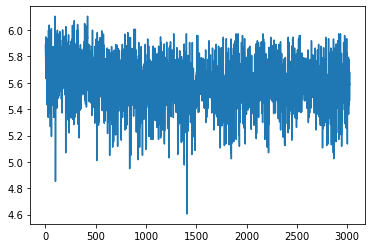

In [0]:
import matplotlib.pyplot as plt 

plt.hit(labels)

In [0]:
import math
print(np.mean(labels))
labels.describe()


labels    5.595749
dtype: float64


,labels
count,3028.000000
mean,5.595749
std,0.169593
min,4.605170
25%,5.497168
50%,5.590987
75%,5.700444
max,6.104793


In [0]:
print(labels)

        labels
0     5.886104
1     5.857933
2     5.808142
3     5.749393
4     5.948035
...        ...
3023  5.641907
3024  5.463832
3025  5.590987
3026  5.587249
3027  5.676754

[3028 rows x 1 columns]


In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
cat_encoder = OneHotEncoder(sparse = False)
def process(dataset):
  p59 = pd.DataFrame(data=dataset[59])
  p59 = std_scaler.fit_transform(p59)
  dataset = dataset.drop(59, axis = 1)
  dataset = cat_encoder.fit_transform(dataset)
  df = pd.DataFrame(dataset)
  df[85] = p59
  return df






In [0]:
x_train_processed = process(x_train)
x_test_pro = process(x_test)

# Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
lin_reg.fit(x_train_processed, y_train)
lin_pred = lin_reg.predict(x_train_processed)
lin_mse = mean_squared_error(y_train, lin_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.12537073807879623

In [0]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(lin_reg, x_train_processed, y_train,
                                scoring="neg_mean_squared_error", cv=5)
lin_rmse = np.sqrt(-lin_scores)
print(lin_rmse)

[1.36038966e-01 1.25320835e-01 1.25079967e-01 1.33871630e-01
 6.82003185e+10]


In [0]:
lin_pred_test = lin_reg.predict(x_test_pro)
lin_mse2 = mean_squared_error(y_test, lin_pred_test)
lin_rmse2 = np.sqrt(lin_mse2)
lin_rmse2

0.13158202782962564

# Random Forest Regressor

In [0]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)
forest_reg.fit(x_train_processed, y_train)


forest_pred = forest_reg.predict(x_train_processed)
forest_mse = mean_squared_error(y_train, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.047383336529373925

In [0]:
from sklearn.model_selection import cross_val_score

forest_scores = cross_val_score(forest_reg, x_train_processed, y_train,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
print(forest_rmse_scores)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

[0.12889375 0.14261507 0.12009883 0.12401124 0.11677908 0.12839449
 0.13344319 0.1286181  0.12685923 0.13224296]


In [0]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [70,100,150], 'max_features': [3,5,7], "bootstrap":[True, False]}
  ]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(x_train_processed, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:516: DataConversionWarning: A column-vector y was passed when a 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators='warn', n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'bootstrap': [True, False], 'max

In [0]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 7, 'n_estimators': 150}

In [0]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.12998665428772532 {'bootstrap': True, 'max_features': 3, 'n_estimators': 70}
0.12972780682656518 {'bootstrap': True, 'max_features': 3, 'n_estimators': 100}
0.12943714449200436 {'bootstrap': True, 'max_features': 3, 'n_estimators': 150}
0.12869315490059963 {'bootstrap': True, 'max_features': 5, 'n_estimators': 70}
0.1283079177813627 {'bootstrap': True, 'max_features': 5, 'n_estimators': 100}
0.12788158436576813 {'bootstrap': True, 'max_features': 5, 'n_estimators': 150}
0.1282467279522662 {'bootstrap': True, 'max_features': 7, 'n_estimators': 70}
0.1278152337140144 {'bootstrap': True, 'max_features': 7, 'n_estimators': 100}
0.12750305572723405 {'bootstrap': True, 'max_features': 7, 'n_estimators': 150}
0.12805120160448322 {'bootstrap': False, 'max_features': 3, 'n_estimators': 70}
0.12756195192117376 {'bootstrap': False, 'max_features': 3, 'n_estimators': 100}
0.12722591688520993 {'bootstrap': False, 'max_features': 3, 'n_estimators': 150}
0.1269877781961462 {'bootstrap': False, 'max

In [0]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances


array([1.25349606e-02, 1.27512999e-02, 8.79227028e-03, 8.27318616e-03,
       8.97036751e-03, 9.18849397e-03, 9.95496592e-03, 6.58543416e-03,
       1.08246007e-02, 1.10579599e-02, 1.15400325e-02, 1.25932321e-02,
       1.22984947e-02, 1.15857033e-02, 1.21693811e-02, 2.74295736e-02,
       2.20825800e-02, 4.37839228e-02, 1.90535923e-03, 1.95386073e-02,
       1.95358872e-02, 3.89096807e-02, 2.31047972e-03, 1.49167207e-02,
       1.75347096e-02, 6.11717164e-05, 1.35723712e-02, 7.32127473e-03,
       1.11408270e-03, 3.57308863e-03, 4.55588846e-03, 2.92516032e-03,
       9.85726365e-03, 7.84679607e-03, 2.22089359e-02, 3.42452586e-03,
       1.53076104e-02, 1.50228684e-02, 3.22266537e-02, 1.42371507e-03,
       2.00222984e-02, 2.69029756e-02, 9.04555065e-04, 3.29372345e-02,
       1.29799568e-02, 1.02123938e-02, 1.04353144e-02, 1.15321695e-02,
       1.20795987e-02, 5.31563449e-03, 9.60737165e-03, 1.19258950e-02,
       1.15990329e-02, 9.48325316e-03, 1.06367330e-02, 1.04367513e-02,
      

In [0]:
#'bootstrap': False, 'max_features': 5, 'n_estimators': 150
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(bootstrap = False, max_features= 5, n_estimators= 150)
forest_reg.fit(x_train_processed, y_train)


forest_pred = forest_reg.predict(x_test_pro)
forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.13061033509045475

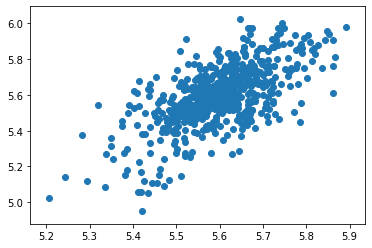

In [0]:
plt.scatter(forest_pred, y_test)


# SGD Regressor Model



In [0]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)


sgd_reg.fit(x_train_processed, y_train)
sgd_pred = sgd_reg.predict(x_train_processed)
sgd_mse = mean_squared_error(y_train, sgd_pred)
sgd_rmse = np.sqrt(sgd_mse)
sgd_rmse

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.12915105727505782

Not very different from Linear regression.

# Polynomial Model
*We will be trying polynomial degree = 2, 3 as a prediction model*

In [0]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(x_train_processed)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
poly_pred = poly_reg.predict(X_poly)
poly_mse = mean_squared_error(y_train, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

0.07782725112785967

In [0]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(x_train_processed)

poly_reg = LinearRegression()
poly_reg.fit(X_poly, y_train)
poly_pred = poly_reg.predict(X_poly)
poly_mse = mean_squared_error(y_train, poly_pred)
poly_rmse = np.sqrt(poly_mse)
poly_rmse

1.7376128294073593e-15

We believe that this rmse is low enough, but there is a concern of overfitting, so we will test it out by regularizing

# Regularized Models

*We will be performing Lasso, Ridge and Net regularization on Linear and Polynomial Model.*


In [0]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

In [0]:
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(x_train_processed, y_train)
ridge_pred = ridge_reg.predict(x_train_processed)
ridge_mse = mean_squared_error(y_train, ridge_pred)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse

0.12512473505790317

In [0]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x_train_processed, y_train)
lasso_pred = lasso_reg.predict(x_train_processed)
lasso_mse = mean_squared_error(y_train, lasso_pred)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse

0.16901595869179417

In [0]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.1)
elastic_net.fit(x_train_processed, y_train)
elastic_pred = elastic_net.predict(x_train_processed)
elastic_mse = mean_squared_error(y_train, elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

0.1485421950672879

**For the Linear Model, the regularizations do not help. Now, we try on the  polynomial model degree=3.**

In [0]:
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly_features.fit_transform(x_train_processed)

lasso_reg_poly = Lasso(alpha=0.1)
lasso_reg_poly.fit(X_poly, y_train)
lasso_pred_poly = lasso_reg_poly.predict(X_poly)
lasso_mse_poly = mean_squared_error(y_train, lasso_pred_poly)
lasso_rmse_poly= np.sqrt(lasso_mse_poly)
lasso_rmse_poly

0.16901595869179417

In [0]:
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly_features.fit_transform(x_train_processed)
ridge_reg_poly = Ridge(alpha=1, solver="cholesky", random_state=42)

ridge_reg_poly.fit(X_poly, y_train)
ridge_pred_poly = ridge_reg_poly.predict(X_poly)
ridge_mse_poly= mean_squared_error(y_train, ridge_pred_poly)
ridge_rmse_poly = np.sqrt(ridge_mse_poly)
ridge_rmse_poly

0.07802424440850067

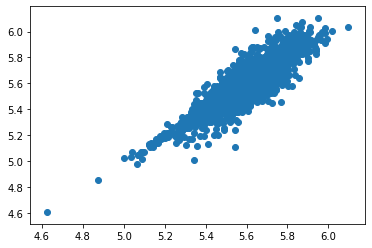

In [0]:
plt.scatter(ridge_pred_poly, y_train)

In [0]:
poly_features = PolynomialFeatures(degree=3, include_bias=True)
X_poly = poly_features.fit_transform(x_train_processed)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.2, random_state=42)
elastic_net.fit(X_poly, y_train)
elastic_pred= elastic_net.predict(X_poly)
elastic_mse = mean_squared_error(y_train, elastic_pred)
elastic_rmse = np.sqrt(elastic_mse)
elastic_rmse

0.1580040928363928

In [0]:
X_poly.shape

(2422, 3828)

In [0]:
x_train_processed.shape

(2422, 86)

# Because ridge with polynomial degree of 3 model seems to be the most promising. We conduct 10-fold CV to test 

In [0]:
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(x_train_processed)
from sklearn.model_selection import cross_val_score

poly_scores = cross_val_score(ridge_reg_poly, X_poly, y_train,
                                scoring="neg_mean_squared_error", cv=10)
poly_rmse_scores = np.sqrt(-poly_scores)
print(poly_rmse_scores)

[0.16328066 0.1738733  0.17264993 0.15444071 0.15574437 0.16654168
 0.16885481 0.16512462 0.15750202 0.17298746]


So far, Polynomial degree of 3 model and random forest models are the most promising. Now, we test on the test set. 

# Gradient Boosting Regression

In [0]:
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
      max_depth=1, random_state=0, loss='ls').fit(x_train_processed, y_train)
gbr_mse = mean_squared_error(y_train, est.predict(x_train_processed)) 
gbr_rmse = np.sqrt(gbr_mse)   
gbr_rmse

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.13013805883201332

In [0]:
gbr_pred_test = est.predict(x_test_pro)
gbr_mse2 = mean_squared_error(y_test, gbr_pred_test)
gbr_rmse2 = np.sqrt(gbr_mse2)
gbr_rmse2

0.13303666728114721

# MLP Regressor Neural Net

In [0]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(100, ), activation='logistic', solver='adam', 
                     alpha=0.0001, batch_size='auto', learning_rate='constant', 
                     learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=False, 
                     random_state=None, tol=0.0001, verbose=True, warm_start=False, 
                     momentum=0.9, nesterovs_momentum=True, early_stopping=True, 
                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                     n_iter_no_change=10)

model.fit(x_train_processed, y_train)


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 10.83238731
Validation score: -594.673607
Iteration 2, loss = 6.71472892
Validation score: -346.697167
Iteration 3, loss = 3.73318630
Validation score: -177.729657
Iteration 4, loss = 1.80447997
Validation score: -76.856750
Iteration 5, loss = 0.72739294
Validation score: -26.333573
Iteration 6, loss = 0.23243991
Validation score: -6.375771
Iteration 7, loss = 0.05808697
Validation score: -0.778079
Iteration 8, loss = 0.01700640
Validation score: 0.059241
Iteration 9, loss = 0.01304173
Validation score: 0.025862
Iteration 10, loss = 0.01354408
Validation score: 0.026279
Iteration 11, loss = 0.01312759
Validation score: 0.069910
Iteration 12, loss = 0.01251157
Validation score: 0.099347
Iteration 13, loss = 0.01214320
Validation score: 0.112684
Iteration 14, loss = 0.01192751
Validation score: 0.121460
Iteration 15, loss = 0.01174478
Validation score: 0.130227
Iteration 16, loss = 0.01156454
Validation score: 0.139071
Iteration 17, loss = 0.01138889
Validation score:

MLPRegressor(activation='logistic', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=True, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=False, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=True, warm_start=False)

In [0]:
pred = model.predict(x_train_processed)


In [0]:
mlp_mse = mean_squared_error(y_train, pred)
mlp_rmse = np.sqrt(mlp_mse)
mlp_rmse

0.1251406074555282

In [0]:
mlp_pred_test = model.predict(x_test_pro)
mlp_mse2 = mean_squared_error(y_test, mlp_pred_test)
mlp_rmse2 = np.sqrt(mlp_mse2)
mlp_rmse2

0.13062673592941185